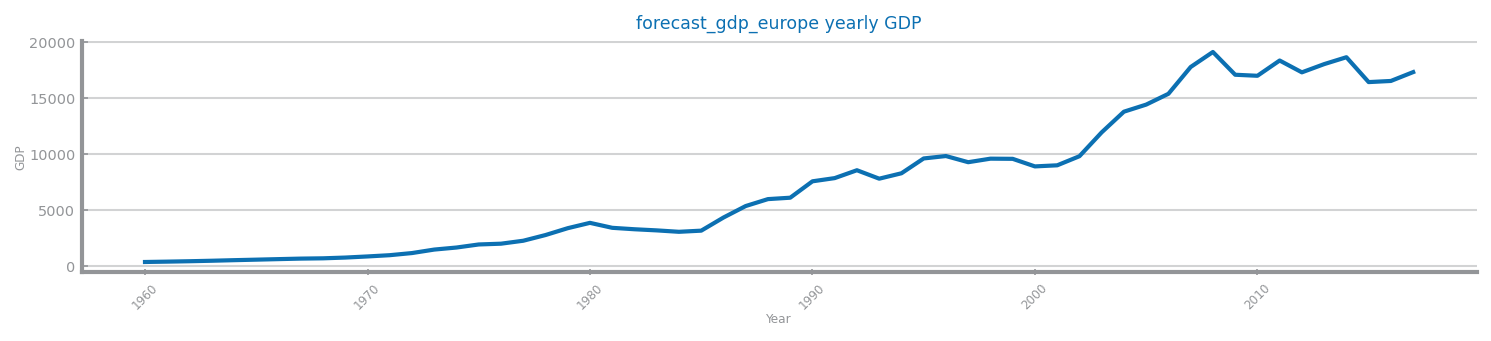

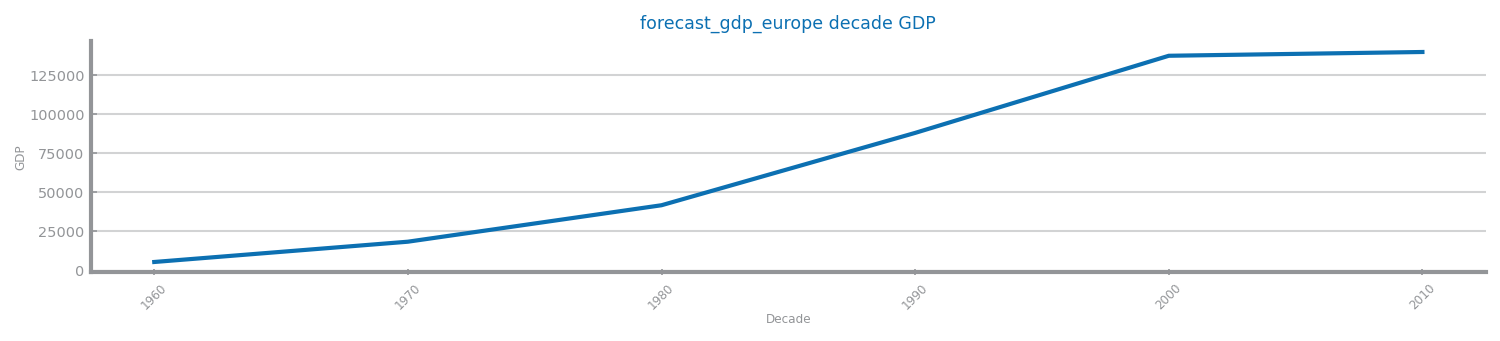

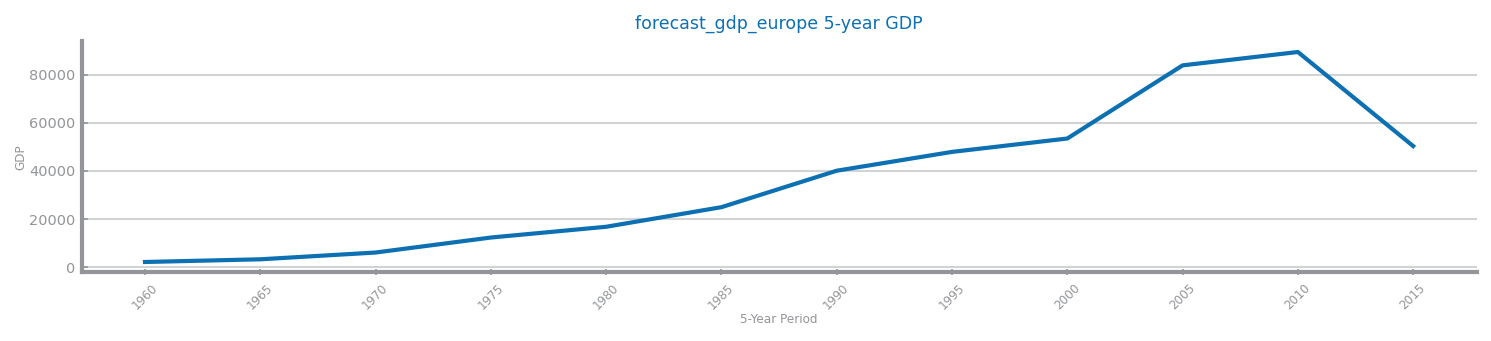

In [1]:
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_line_chart, HEIGHT

file_tag = "forecast_gdp_europe"
target = "GDP"
data: DataFrame = read_csv(
    "/Users/dominikfrank/Library/Mobile Documents/com~apple~CloudDocs/Desktop/University/Master/Semester 1/PII/Data Science/Code for Project/DataScience/forecast_gdp_europe.csv",
    index_col="Year",
    sep=",",
    decimal=".",
    parse_dates=True,
    infer_datetime_format=True,
)

series: Series = data[target]

# Plot yearly GDP
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} yearly {target}",
)

# Aggregate by decade
def aggregate_by_decade(series: Series) -> Series:
    decade_series = series.resample('10AS').sum()
    decade_series.index = decade_series.index.to_period('10A')
    return decade_series

decade_agg: Series = aggregate_by_decade(series)

# Convert Period index to string for compatibility with matplotlib
decade_agg.index = decade_agg.index.astype(str)

# Plot decade-based GDP
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    decade_agg.index.to_list(),
    decade_agg.to_list(),
    xlabel="Decade",
    ylabel=target,
    title=f"{file_tag} decade {target}",
)

# Aggregate by 5-year periods
def aggregate_by_five_years(series: Series) -> Series:
    five_year_series = series.resample('5AS').sum()
    five_year_series.index = five_year_series.index.to_period('5A')
    return five_year_series

five_year_agg: Series = aggregate_by_five_years(series)

# Convert Period index to string for compatibility with matplotlib
five_year_agg.index = five_year_agg.index.astype(str)

# Plot 5-year-based GDP
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    five_year_agg.index.to_list(),
    five_year_agg.to_list(),
    xlabel="5-Year Period",
    ylabel=target,
    title=f"{file_tag} 5-year {target}",
)

show()


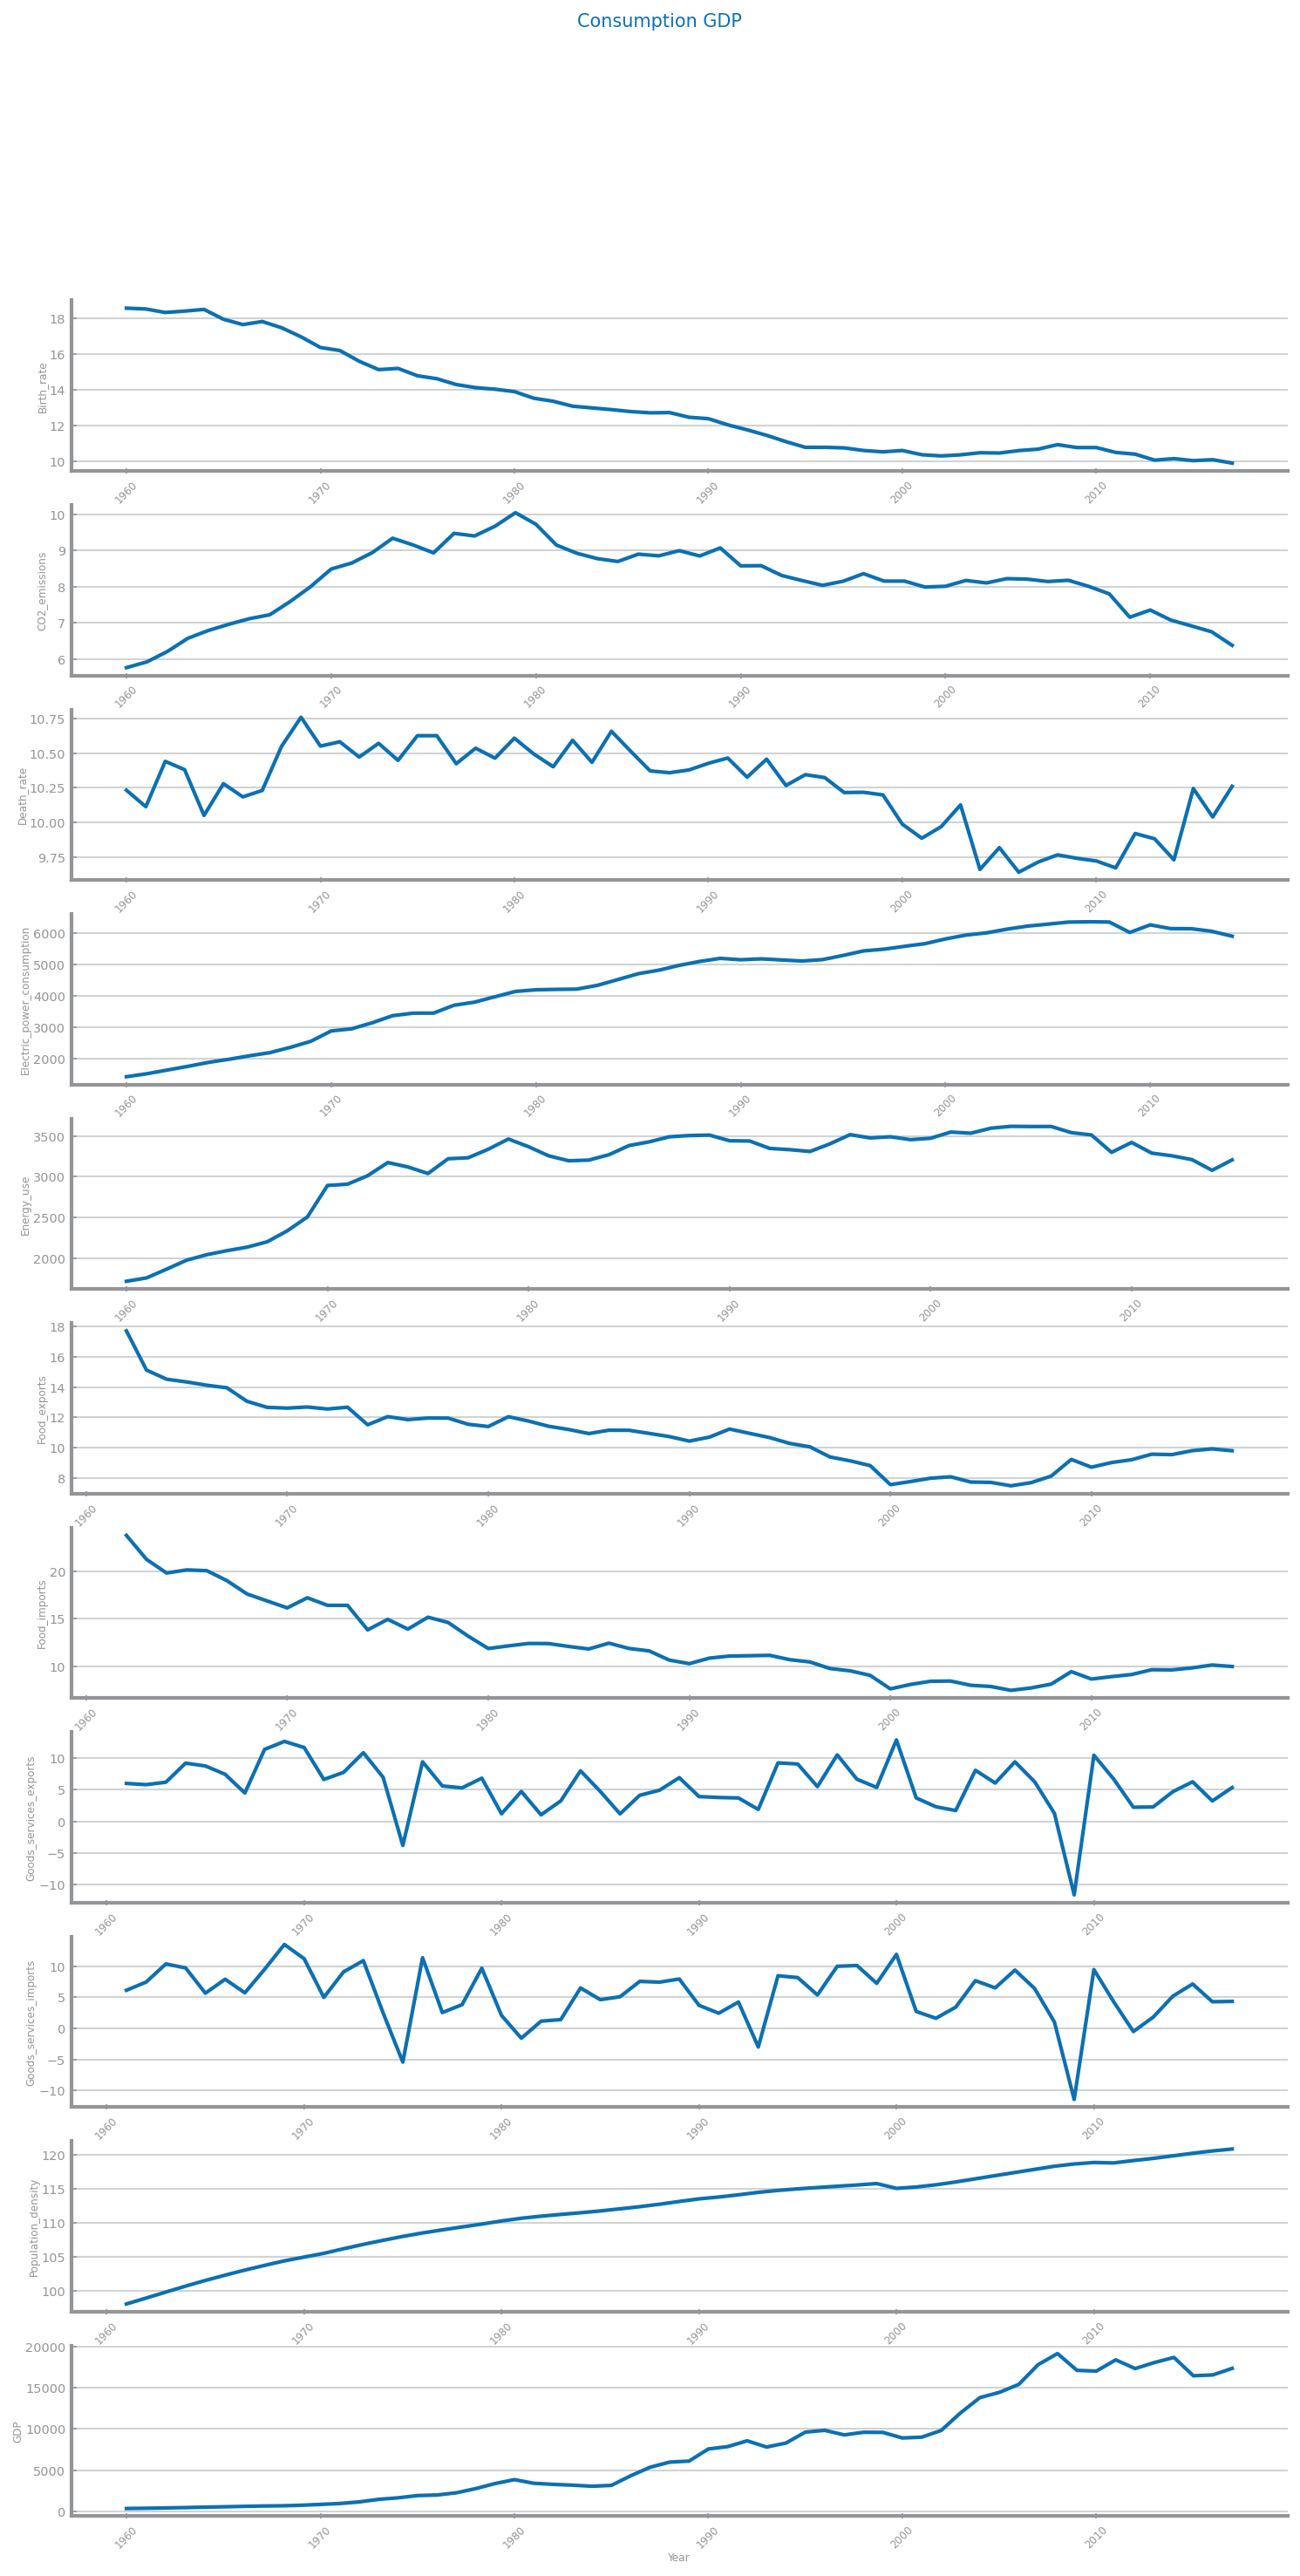

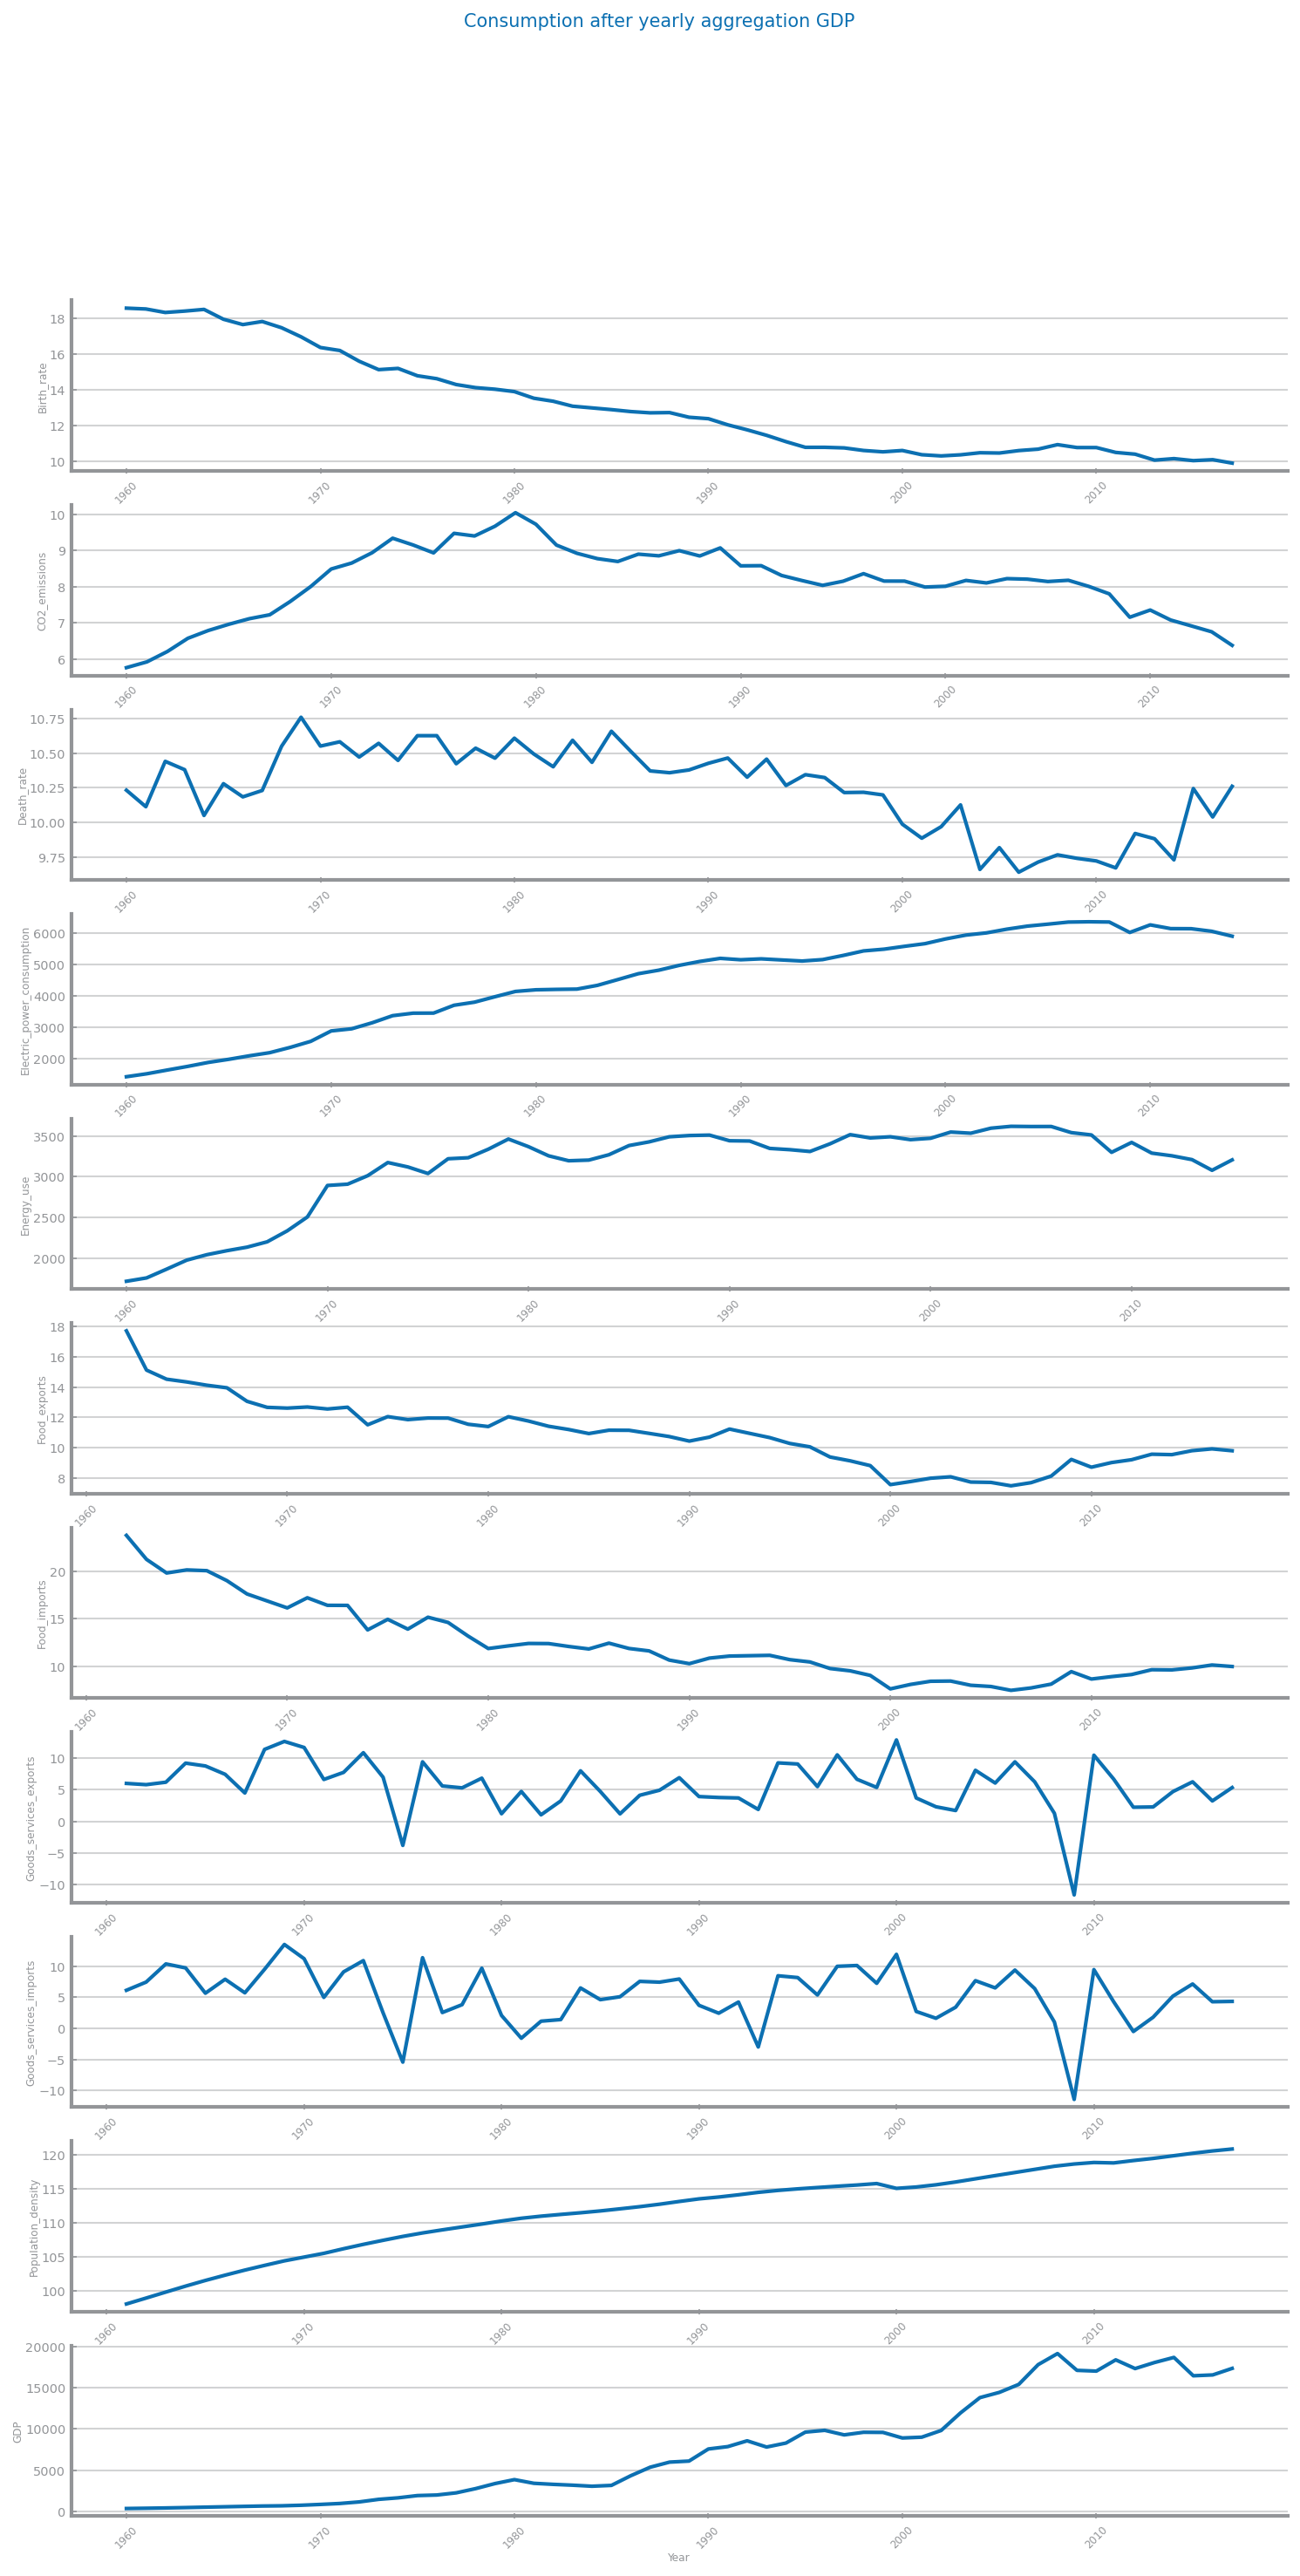

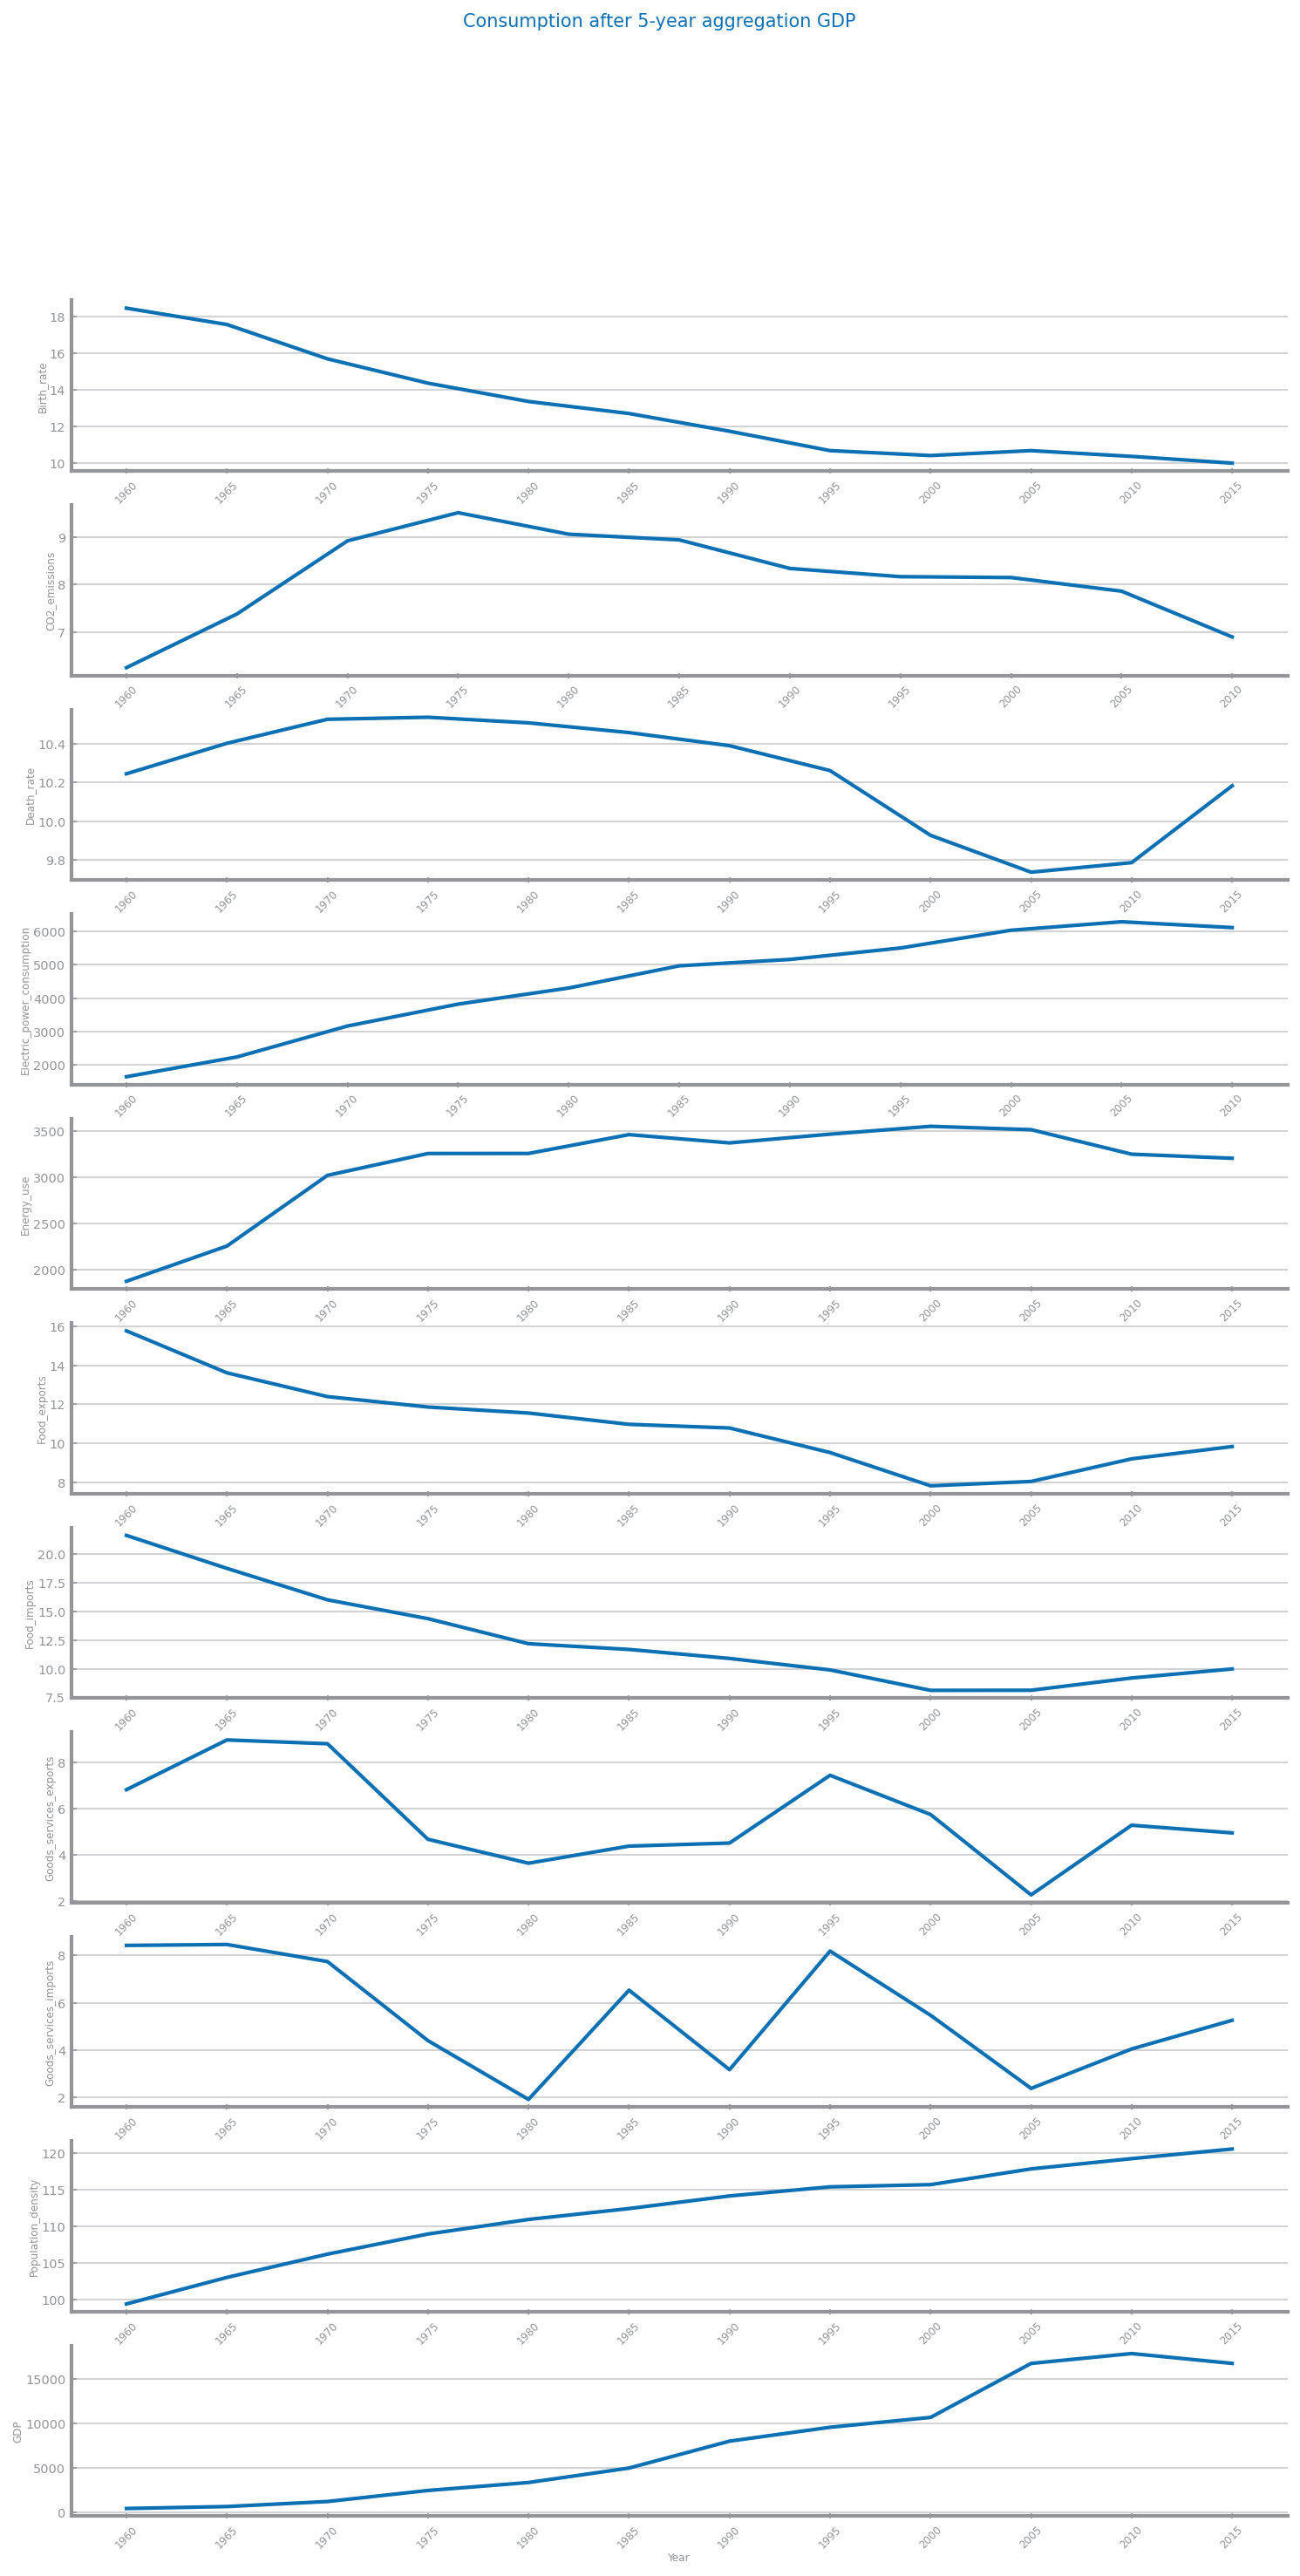

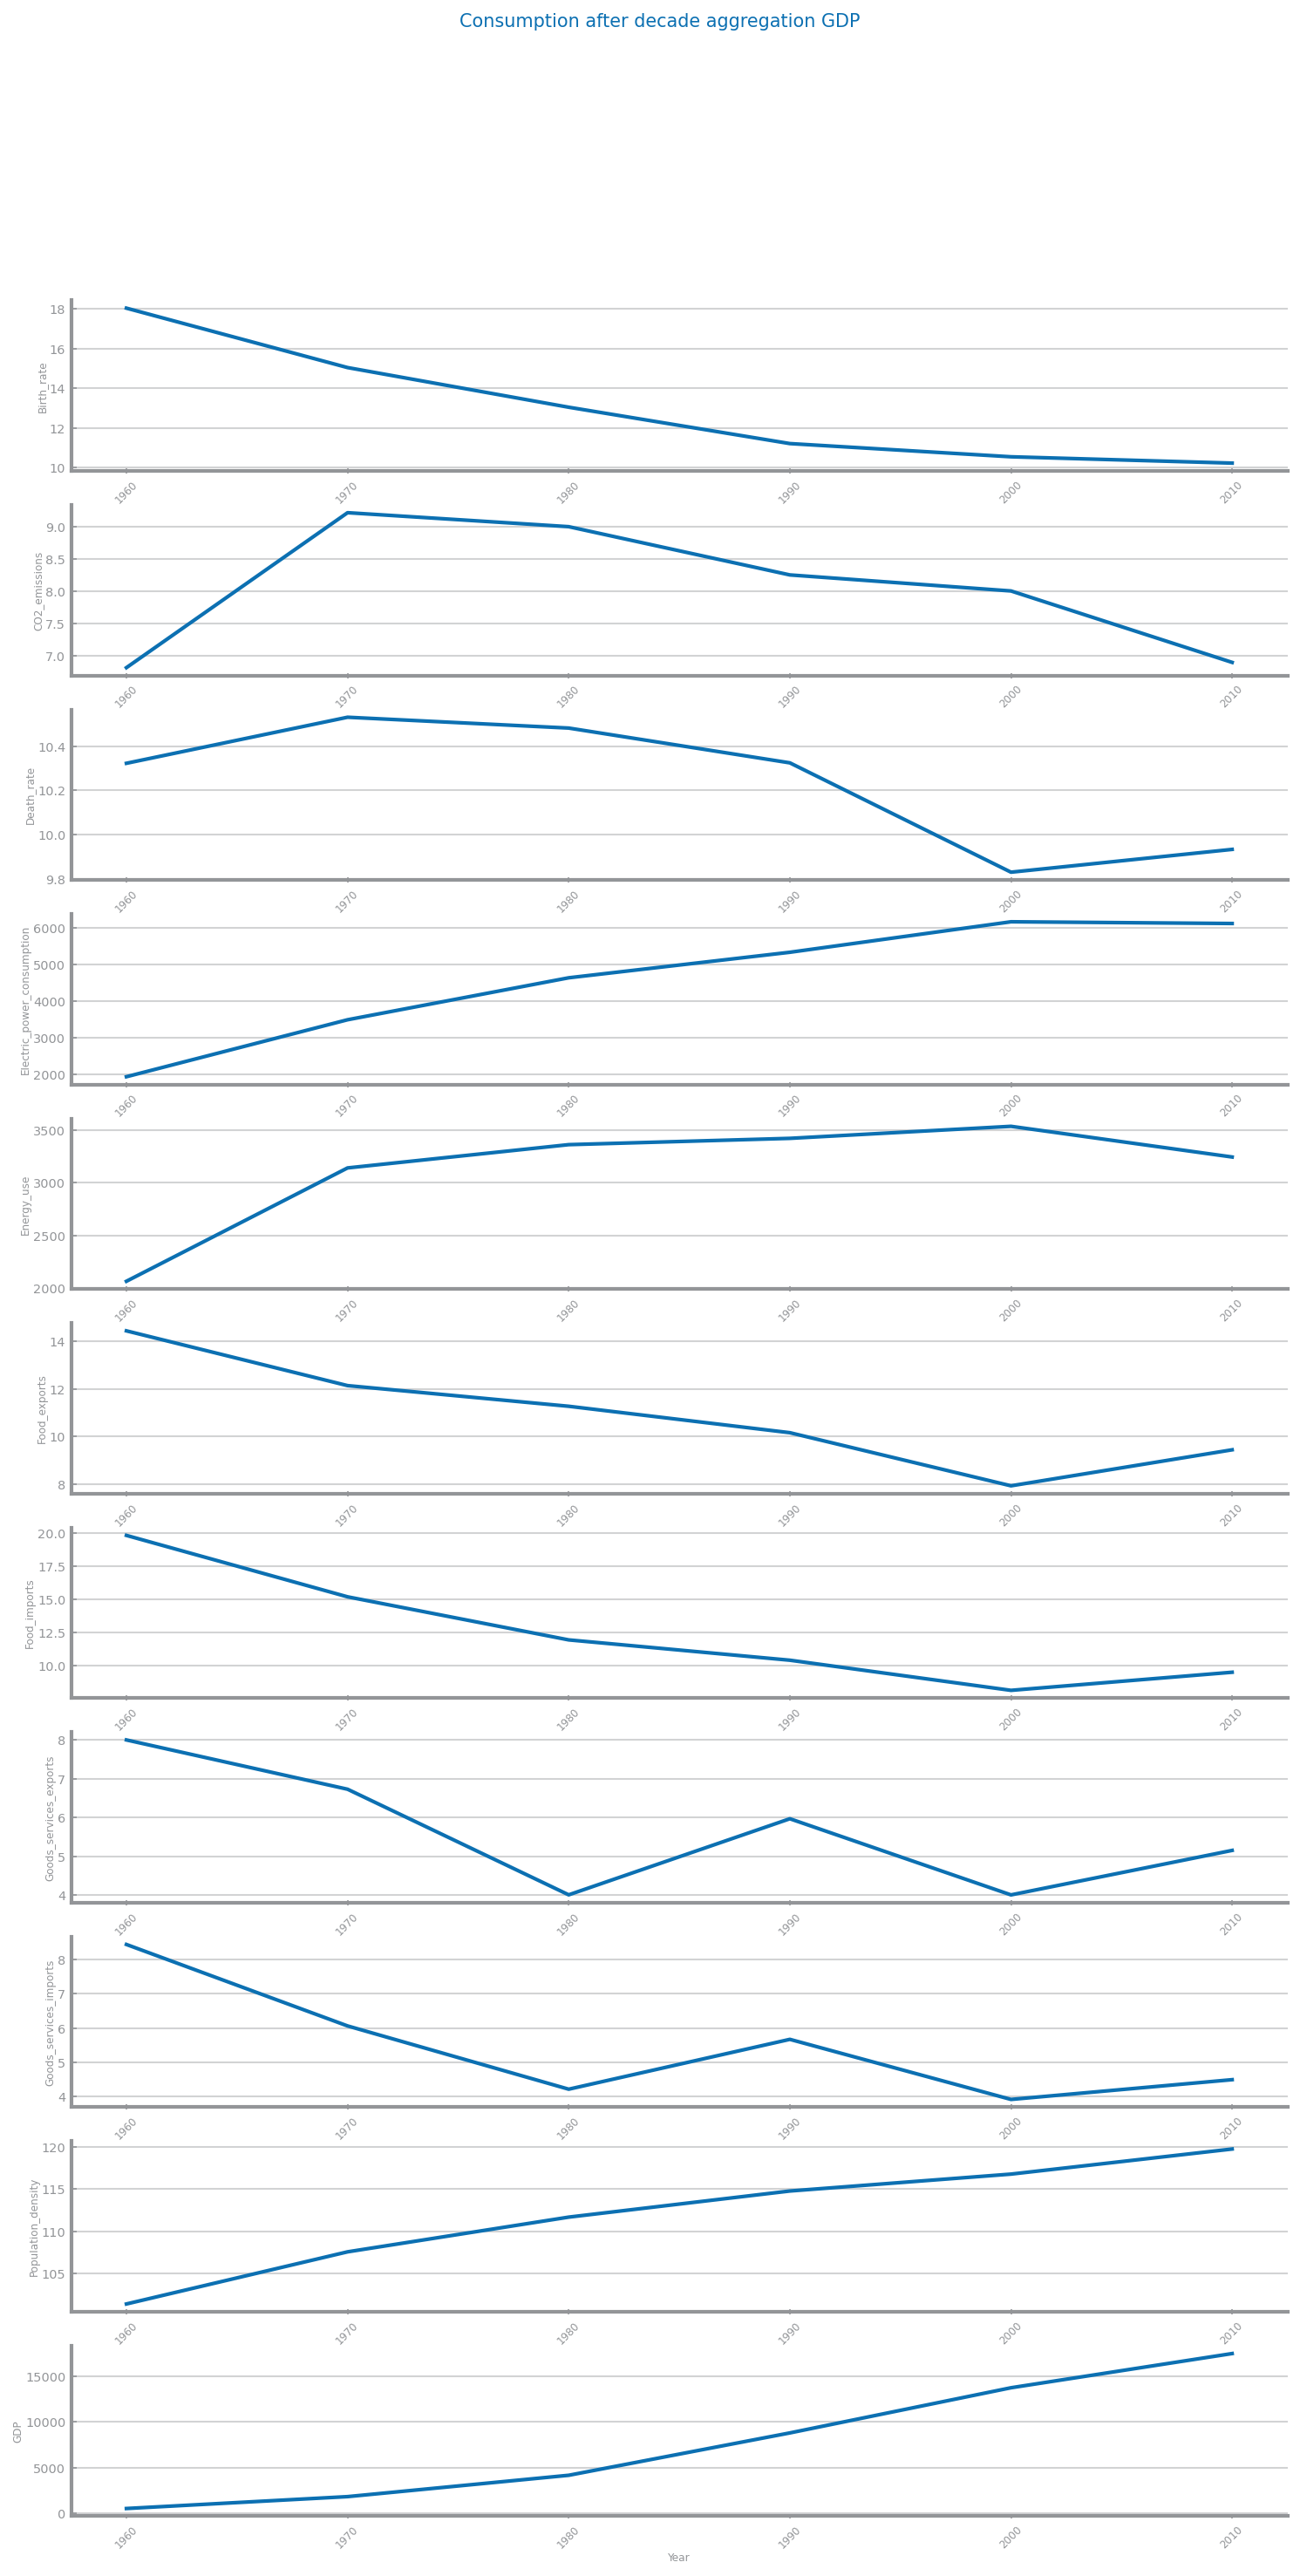

In [7]:
from dslabs_functions import plot_ts_multivariate_chart, ts_aggregation_by
from pandas import read_csv, DataFrame

file_tag = "Consumption"
target = "GDP"
data: DataFrame = read_csv(
    "/Users/dominikfrank/Library/Mobile Documents/com~apple~CloudDocs/Desktop/University/Master/Semester 1/PII/Data Science/Code for Project/DataScience/forecast_gdp_europe.csv",
    index_col="Year",
    sep=",",
    decimal=".",
    parse_dates=True,
    infer_datetime_format=True,
)

# Plot original data
plot_ts_multivariate_chart(data, title=f"{file_tag} {target}")

# Aggregate data by year
agg_df_year: DataFrame = ts_aggregation_by(data, gran_level="Y", agg_func="mean")
plot_ts_multivariate_chart(agg_df_year, title=f"{file_tag} after yearly aggregation {target}")

# Aggregate data by decade
def aggregate_by_decade(df: DataFrame) -> DataFrame:
    df_decade = df.resample('10AS').mean()
    df_decade.index = df_decade.index.to_period('10A')
    return df_decade

agg_df_decade: DataFrame = aggregate_by_decade(data)
agg_df_decade.index = agg_df_decade.index.astype(str)  # Convert index for compatibility
# Aggregate data by 5-year periods
def aggregate_by_five_years(df: DataFrame) -> DataFrame:
    df_five_year = df.resample('5AS').mean()
    df_five_year.index = df_five_year.index.to_period('5A')
    return df_five_year

agg_df_five_year: DataFrame = aggregate_by_five_years(data)
agg_df_five_year.index = agg_df_five_year.index.astype(str)  # Convert index for compatibility
plot_ts_multivariate_chart(agg_df_five_year, title=f"{file_tag} after 5-year aggregation {target}")

show()

plot_ts_multivariate_chart(agg_df_decade, title=f"{file_tag} after decade aggregation {target}")

show()

In [8]:
import os
from pandas import read_csv, DataFrame

file_tag = "Gdp_Europe"
target = "GDP"
data: DataFrame = read_csv(
    "/Users/dominikfrank/Library/Mobile Documents/com~apple~CloudDocs/Desktop/University/Master/Semester 1/PII/Data Science/Code for Project/DataScience/forecast_gdp_europe.csv",
    index_col="Year",
    sep=",",
    decimal=".",
    parse_dates=True,
    infer_datetime_format=True,
)

# Aggregate data by year
agg_df_year: DataFrame = data.resample('AS').mean()  # Annual aggregation
agg_df_year.index = agg_df_year.index.to_period('A')

# Aggregate data by decade
def aggregate_by_decade(df: DataFrame) -> DataFrame:
    df_decade = df.resample('10AS').mean()
    df_decade.index = df_decade.index.to_period('10A')
    return df_decade

agg_df_decade: DataFrame = aggregate_by_decade(data)

# Aggregate data by 5-year periods
def aggregate_by_five_years(df: DataFrame) -> DataFrame:
    df_five_year = df.resample('5AS').mean()
    df_five_year.index = df_five_year.index.to_period('5A')
    return df_five_year

agg_df_five_year: DataFrame = aggregate_by_five_years(data)

# Save datasets to folder
output_folder = "Transformed_Datasets"
os.makedirs(output_folder, exist_ok=True)

agg_df_year.to_csv(os.path.join(output_folder, "yearly_aggregated_data.csv"), index=True)
agg_df_five_year.to_csv(os.path.join(output_folder, "5years_aggregated_data.csv"), index=True)
agg_df_decade.to_csv(os.path.join(output_folder, "decade_aggregated_data.csv"), index=True)

print(f"Datasets saved in folder: {output_folder}")


Datasets saved in folder: Transformed_Datasets
